# Data Analysis on Video Game Sales

## Visualization Data

## Final Objective
**Predict Japanese Sales using North America, European and Other Sales, Genre and Platform.**
> This result is important for games that want to enter the Japenese Market, but don't know what to expect for their respective sales team. Also, it will be a good measure to invest (or not) in japanese translations.

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Data

In [4]:
path = "../Data/visualizations_sales.csv"

In [7]:
visualization_df = pd.read_csv(path, index_col=0)

In [8]:
visualization_df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Plots

### Numerical Analysis

- **Plotting Top 15 Publishers and their respective Global Sales Amount**

In [61]:
df_globalsales_by_publisher = visualization_df.copy()
df_globalsales_by_publisher = df_globalsales_by_publisher[["Publisher", "Global_Sales"]]
df_globalsales_by_publisher = pd.DataFrame(df_globalsales_by_publisher.groupby('Publisher')['Global_Sales'].sum())

In [31]:
top15_publishers_df = df_globalsales_by_publisher.sort_values(by="Global_Sales", ascending=False)[:15]

In [49]:
others_row = df_globalsales_by_publisher.sort_values(by="Global_Sales", ascending=False)[15:].sum()
others_row.index = ["Others"]

In [62]:
top15_copy = pd.concat([top15_publishers_df, others_row])
top15_copy.loc["Others"]["Global_Sales"] = top15_copy.loc["Others"][0]
top15_publishers_df = top15_copy.drop(0, axis="columns")

In [63]:
top15_publishers_df

,Global_Sales
Nintendo,1784.43
Electronic Arts,1093.39
Activision,721.41
Sony Computer Entertainment,607.28
Ubisoft,473.54
Take-Two Interactive,399.30
THQ,340.44
Konami Digital Entertainment,278.56
Sega,270.70
Namco Bandai Games,253.65


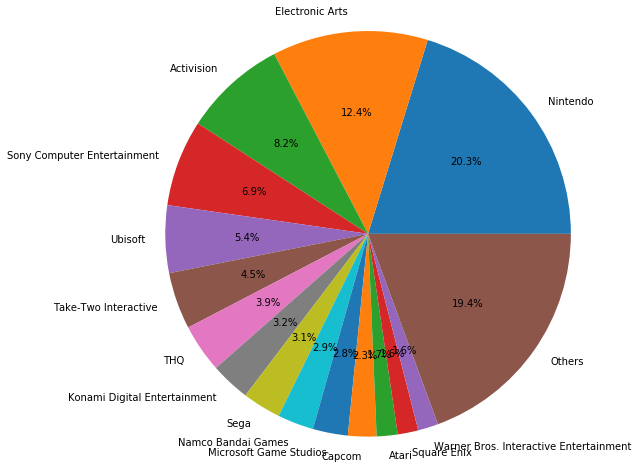

In [88]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(top15_publishers_df.Global_Sales, labels=top15_publishers_df.index, autopct='%1.1f%%', radius=1)
ax.axis('equal')

plt.show()